In [492]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [230]:
tmdb_movies = pd.read_csv(r'C:\Users\preet\Desktop\Movies\tmdb_movies_data.csv')

## Replacing 0's in budget with corresponding revenue and vice-versa

In [231]:
tmdb_movies[(tmdb_movies['budget']==0)].shape[0]



5696

In [232]:
tmdb_movies[(tmdb_movies['revenue']==0)].shape[0]

6016

In [233]:
tmdb_movies.budget.replace(0,tmdb_movies.revenue,inplace=True)

In [234]:
tmdb_test.revenue.replace(0,tmdb_test.budget,inplace=True)

In [235]:
cast_actress = pd.read_csv(r'C:\Users\preet\Desktop\Movies\The_Best_Actresses_Ever.csv',encoding='latin-1')
cast_actor=pd.read_csv(r'C:\Users\preet\Desktop\Movies\The_Most_Popular_Actors.csv',encoding='latin-1')

In [236]:
cast=pd.concat([cast_actress, cast_actor], axis=0)

In [237]:
cast['Description']=cast['Description'].map(lambda x:x.rstrip('points'))

In [238]:
cast['Description']=cast['Description'].astype(float)

In [239]:
cast_new=cast[['Name','Description']]

In [240]:
director=pd.read_csv(r'C:\Users\preet\Desktop\Movies\My Complete Directors List.csv',encoding='latin-1')

In [241]:
director

,Position,Const,Created,Modified,Description,Name,Known For,Birth Date
0,1,nm0000229,29-07-12,29-09-16,65417 point,Steven Spielberg,Schindler's List,18-12-46
1,2,nm0634240,11-08-12,24-04-16,54135 point,Christopher Nolan,Inception,30-07-70
2,3,nm0000217,29-07-12,28-02-14,38209 point,Martin Scorsese,Taxi Driver,17-11-42
3,4,nm0000233,05-08-12,21-01-16,36893 point,Quentin Tarantino,Reservoir Dogs,27-03-63
4,5,nm0000399,06-08-12,28-02-15,34425 point,David Fincher,Se7en,28-08-62
5,6,nm0000040,27-07-12,11-08-12,28290 point,Stanley Kubrick,2001: A Space Odyssey,26-07-28
6,7,nm0000709,04-08-12,19-07-16,27236 point,Robert Zemeckis,Back to the Future,14-05-51
7,8,nm0000142,03-08-12,15-07-17,26647 point,Clint Eastwood,Million Dollar Baby,31-05-30
8,9,nm0000631,11-08-12,02-01-16,25778 point,Ridley Scott,The Martian,30-11-37
9,10,nm0000338,29-07-12,15-01-17,24184 point,Francis Ford Coppola,Apocalypse Now,07-04-39


In [242]:
director[director['Description']=='729 üpom']

,Position,Const,Created,Modified,Description,Name,Known For,Birth Date


In [243]:
director=director.drop(director.index[507])
director['Description']=director['Description'].map(lambda x:x.rstrip('point'))
director['Description']=director['Description'].astype(float)

In [244]:
director_new=director[['Description','Name']]
director_new=director_new.rename(columns={"Name":"director"})

In [245]:
production=pd.read_csv(r'C:\Users\preet\Desktop\Movies\production_companies_data.csv')

In [246]:
production['Total Domestic Box Office']=production['Total Domestic Box Office'].map(lambda x:x.lstrip('$'))
production['Total Domestic Box Office']=production['Total Domestic Box Office'].replace('\,','')
production['Total Domestic Box Office']=production['Total Domestic Box Office'].apply(lambda x: x.replace(',',''))
production['Total Worldwide Box Office']=production['Total Worldwide Box Office'].map(lambda x:x.lstrip('$'))
production['Total Worldwide Box Office']=production['Total Worldwide Box Office'].apply(lambda x: x.replace(',',''))

In [247]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(production[['No. of Movies','Total Domestic Box Office','Total Worldwide Box Office']])
df_normalized = pd.DataFrame(scaled_array)
df_normalized

,0,1,2
0,1.000000,1.000000,1.000000
1,0.986957,0.923446,0.960298
2,0.965217,0.941385,0.911028
3,0.534783,0.825408,0.862746
4,0.252174,0.703369,0.781542
5,0.569565,0.639794,0.653083
6,0.447826,0.534664,0.571998
7,0.300000,0.341818,0.376814
8,0.247826,0.341801,0.371694
9,0.191304,0.306640,0.346403


In [248]:
production['Total Domestic Box Office']=production['Total Domestic Box Office'].astype('float')
production['Total Worldwide Box Office']=production['Total Worldwide Box Office'].astype('float')

In [249]:
#production['Score']=production['No. of Movies']*(0.01)+production['Total Domestic Box Office']*(0.005)+production['Total Worldwide Box Office']*(0.008)
production['Score']=production['Total Worldwide Box Office']/(100000000) + production['No. of Movies']

In [250]:
production

,Production Companies,No. of Movies,Total Domestic Box Office,Total Worldwide Box Office,Score
0,Warner Bros.,231,1.845186e+10,4.303795e+10,661.379510
1,Universal Pictures,228,1.703929e+10,4.134544e+10,641.454416
2,Columbia Pictures,223,1.737031e+10,3.924508e+10,615.450787
3,Walt Disney Pictures,124,1.523031e+10,3.718680e+10,495.867979
4,Marvel Studios,59,1.297846e+10,3.372509e+10,396.250863
5,Paramount Pictures,132,1.180539e+10,2.824885e+10,414.488522
6,20th Century Fox,104,9.865534e+09,2.479222e+10,351.922163
7,Dune Entertainment,70,6.307178e+09,1.647153e+10,234.715337
8,Legendary Pictures,58,6.306866e+09,1.625327e+10,220.532699
9,DreamWorks Animation,45,5.658073e+09,1.517509e+10,196.750862


In [251]:
production=production.rename(columns={"Production Companies":"Name"})

In [252]:
mydict_prod = dict(zip(production.Name, production.Score))
mydict_cast = dict(zip(cast_new.Name, cast_new.Description))

tmdb_movies['cast'] = tmdb_movies['cast'].astype('str')



In [253]:
l = []
for index, row in tmdb_movies.iterrows():

  s = row['cast']
  x= s.split('|')
  sum =0
  for i in x:
    if i in mydict_cast:
      sum = sum + mydict_cast.get(i)
    else:
      sum = sum + 0
  l.append(sum)
  
tmdb_movies['cast_points'] = pd.Series(l)

In [254]:
tmdb_movies['production_points'] = 0

tmdb_movies['production_companies'] = tmdb_movies['production_companies'].astype('str')

l = []
for index, row in tmdb_movies.iterrows():

  s = row['production_companies']
  x=s.split('|')
  sum =0
  for i in x:
    if i in mydict_prod:
      sum = sum + mydict_prod.get(i)
    else:
      sum = sum + 0
  l.append(sum)
  
tmdb_movies['production_points'] = pd.Series(l)


In [255]:
tmdb_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_points,production_points
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,28364.0,464.856889
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,65966.0,0.000000
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,15779.0,230.631971
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,116481.0,209.264378
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,36017.0,830.788504
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08,235036.0,357.957279
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08,47759.0,500.611595
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08,142350.0,107.785020
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09,35039.0,720.641614
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/2015,3935,8.0,2015,1.609999e+08,7.854116e+08,0.0,495.867979


In [256]:
new_tmdb=pd.merge(tmdb_movies,director_new,on='director',how='left')

In [257]:
new_tmdb = new_tmdb.rename(columns = {"Description":"Director_points"})

## Genres


In [258]:
def get_decade_by_year(year):
    decade = year - (year%10)
    decade_plus_10 = decade +10
    decade_as_str = str(decade)+'-'+ str(decade_plus_10)
    return decade_as_str

In [259]:
df_copy = new_tmdb.copy()
year_of_release = []
decade_of_release = []
month_of_release = []
for x in range(len(df_copy)):
    year = int(df_copy.iloc[x]['release_date'][-4:])
    month = int(df_copy.iloc[x]['release_date'].split('/')[0])
    year_of_release.append(year) 
    decade_of_release.append(get_decade_by_year(year))
    month_of_release.append(month)
df_copy['year_of_release'] = year_of_release
df_copy['decade_of_release'] = decade_of_release
df_copy['month_of_release'] = month_of_release

In [260]:
df_copy_for_genres = df_copy.copy()

In [261]:
import collections
genre_by_decade = collections.OrderedDict()
for i in range(len(df_copy_for_genres)):
    decade = df_copy_for_genres.iloc[i]['decade_of_release']
    if decade not in genre_by_decade:
        genre_by_decade[decade] = {}
    if type(df_copy_for_genres.iloc[i]['genres'])==str:
        genres_as_list = df_copy_for_genres.iloc[i]['genres'].split('|')
        for each_genre_in_movie in genres_as_list:
            if each_genre_in_movie not in genre_by_decade[decade]:
                genre_by_decade[decade][each_genre_in_movie] =1
            else:
                genre_by_decade[decade][each_genre_in_movie]+=1

In [488]:
df = pd.DataFrame(genre_by_decade)
cols= sorted(list(df.columns))
df[cols]

,1960-1970,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
Action,78,123,275,457,782,681
Adventure,64,79,177,278,506,376
Animation,16,17,38,79,297,254
Comedy,113,122,429,738,1357,1044
Crime,43,83,153,270,468,341
Documentary,2,13,13,23,144,325
Drama,168,240,424,865,1621,1458
Family,39,39,105,274,472,305
Fantasy,23,30,124,189,320,233
Foreign,9,3,8,32,103,33


In [499]:
df_with_scores = df.copy()
columns = list(df.columns)
for column in columns:
    df_with_scores[column] = 100*df_with_scores[column] /  df_with_scores[column].sum()
cols= sorted(list(df.columns))
df_with_scores[cols]

,1960-1970,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
Action,8.478261,9.425287,9.846044,9.582722,8.469620,8.477530
Adventure,6.956522,6.053640,6.337272,5.829314,5.480342,4.680692
Animation,1.739130,1.302682,1.360544,1.656532,3.216723,3.161957
Comedy,12.282609,9.348659,15.359828,15.474942,14.697281,12.996390
Crime,4.673913,6.360153,5.477981,5.661564,5.068775,4.244989
Documentary,0.217391,0.996169,0.465449,0.482281,1.559623,4.045811
Drama,18.260870,18.390805,15.180809,18.137974,17.556590,18.150131
Family,4.239130,2.988506,3.759398,5.745439,5.112098,3.796838
Fantasy,2.500000,2.298851,4.439671,3.963095,3.465829,2.900535
Foreign,0.978261,0.229885,0.286430,0.671000,1.115564,0.410805


In [264]:
df_with_scores_add_new_column = df_with_scores.copy()

In [265]:
tmdb_with_genre_score = df_copy.copy()
genre_score = []
current_genre_score = []

for i in range(len(tmdb_with_genre_score)):
    if type(tmdb_with_genre_score.iloc[i]['genres'])==str:
        each_movie_genre_score =0
        each_movie_current_genre_score = 0
        
        decade_of_release = tmdb_with_genre_score.iloc[i]['decade_of_release']
        genres_as_list = df_copy_for_genres.iloc[i]['genres'].split('|')
        for each_genre_in_movie in genres_as_list:
            each_movie_genre_score+=df_with_scores_add_new_column[decade_of_release][each_genre_in_movie]
            each_movie_current_genre_score+=df_with_scores_add_new_column['2010-2020'][each_genre_in_movie]
    else:
        each_movie_genre_score = 0
        each_movie_current_genre_score = 0
        
    genre_score.append(each_movie_genre_score)
    current_genre_score.append(each_movie_current_genre_score)
    
tmdb_with_genre_score['genre_score_atRelease'] = genre_score
tmdb_with_genre_score['genre_score_atPresent'] = current_genre_score

In [266]:
tmdb_with_genre_score.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_points,production_points,Director_points,year_of_release,month_of_release,genre_score_atRelease,genre_score_atPresent
count,10900.000000,10900.000000,1.090000e+04,1.090000e+04,10900.000000,10900.000000,10900.000000,10900.000000,1.090000e+04,1.090000e+04,10900.000000,10900.000000,4162.000000,10900.000000,10900.000000,10900.000000,10900.000000
mean,65980.661284,0.649498,1.631633e+07,3.995642e+07,102.101743,218.236789,5.975174,2001.320367,1.762488e+07,5.153980e+07,25265.098257,145.226076,4314.046372,2001.320367,6.829358,23.061685,22.669048
std,92054.450204,1.034034,3.192169e+07,1.170185e+08,31.358108,577.849608,0.934497,12.809369,3.438479e+07,1.446711e+08,43221.119978,250.068842,8591.149826,12.809369,3.440669,10.788277,10.514537
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.500000,1960.000000,1.000000,0.000000,0.000000
25%,10587.750000,0.207759,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,284.000000,1995.000000,4.000000,15.877830,16.058758
50%,20617.000000,0.384145,1.175280e+06,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,3559.500000,0.000000,1266.500000,2006.000000,7.000000,21.630435,21.349434
75%,75480.250000,0.716003,2.000000e+07,2.420708e+07,111.000000,146.000000,6.600000,2011.000000,2.098589e+07,3.388830e+07,34627.000000,171.816604,4397.000000,2011.000000,10.000000,31.146521,31.146521
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,434449.000000,1537.533576,65417.000000,2015.000000,12.000000,59.446425,57.226441


In [267]:
oscars = pd.read_csv(r'C:\Users\preet\Desktop\Movies\oscars.csv')

In [268]:
oscars

,Year,Ceremony,Award,Winner,Name,original_title
0,1930/1931,4,Actor,NaN,Adolphe Menjou,The Front Page
1,1975,48,Actor,NaN,Al Pacino,Dog Day Afternoon
2,1973,46,Actor,NaN,Al Pacino,Serpico
3,1974,47,Actor,NaN,Al Pacino,The Godfather Part II
4,1968,41,Actor,NaN,Alan Arkin,The Heart Is a Lonely Hunter
5,1966,39,Actor,NaN,Alan Arkin,The Russians Are Coming The Russians Are Coming
6,1968,41,Actor,NaN,Alan Bates,The Fixer
7,1974,47,Actor,NaN,Albert Finney,Murder on the Orient Express
8,1963,36,Actor,NaN,Albert Finney,Tom Jones
9,1957,30,Actor,1.0,Alec Guinness,The Bridge on the River Kwai


In [269]:
oscars_new = oscars[['original_title','Winner']]
#director_new=director[['Description','Name']]

In [270]:
oscars_new.fillna(0)

,original_title,Winner
0,The Front Page,0.0
1,Dog Day Afternoon,0.0
2,Serpico,0.0
3,The Godfather Part II,0.0
4,The Heart Is a Lonely Hunter,0.0
5,The Russians Are Coming The Russians Are Coming,0.0
6,The Fixer,0.0
7,Murder on the Orient Express,0.0
8,Tom Jones,0.0
9,The Bridge on the River Kwai,1.0


In [271]:
oscar_sum = oscars_new.groupby(['original_title']).agg({'Winner': 'sum'})

In [272]:
oscar_sum

,Winner
original_title,
"""Charlie McCarthy""",1.0
'Made by Fred Zinnemann with the cooperation of Paramount Pictures Corporation for the Los Angeles Orthopaedic Hospital',1.0
'Round Midnight,0.0
(Arthur Edeson),0.0
"(First National Studio Sound Department, George Groves, Sound Director)",0.0
"(Gaetano Gaudio), (Harry Perry)",0.0
"(George Abbott), (Maxwell Anderson), (Del Andrews)",0.0
(Hans Dreier),0.0
(Howard Estabrook),0.0


In [273]:
tmdb_with_oscar=pd.merge(tmdb_with_genre_score,oscar_sum,on='original_title',how='left')

In [274]:
tmdb_with_oscar

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,revenue_adj,cast_points,production_points,Director_points,year_of_release,decade_of_release,month_of_release,genre_score_atRelease,genre_score_atPresent,Winner
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,1.392446e+09,28364.0,464.856889,NaN,2015,2010-2020,6,29.777169,29.777169,NaN
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,3.481613e+08,65966.0,0.000000,1342.0,2015,2010-2020,5,29.777169,29.777169,NaN
2,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,3.481613e+08,65966.0,0.000000,54.0,2015,2010-2020,5,29.777169,29.777169,NaN
3,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2.716190e+08,15779.0,230.631971,1024.0,2015,2010-2020,3,21.299639,21.299639,NaN
4,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,1.902723e+09,116481.0,209.264378,5050.0,2015,2010-2020,12,20.614963,20.614963,NaN
5,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,1.385749e+09,36017.0,830.788504,3614.0,2015,2010-2020,4,24.785261,24.785261,NaN
6,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,4.903142e+08,235036.0,357.957279,NaN,2015,2010-2020,12,35.242126,35.242126,1.0
7,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,4.053551e+08,47759.0,500.611595,NaN,2015,2010-2020,6,29.777169,29.777169,NaN
8,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,5.477497e+08,142350.0,107.785020,25778.0,2015,2010-2020,9,27.387029,27.387029,0.0
9,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,1.064192e+09,35039.0,720.641614,NaN,2015,2010-2020,6,24.635877,24.635877,NaN


In [275]:
tmdb_with_oscar=tmdb_with_oscar.rename(columns={"Winner":"oscars_won"})

In [276]:
tmdb_with_oscar.isna().sum()

id                           0
imdb_id                     10
popularity                   0
budget                       0
revenue                      0
original_title               0
cast                         0
homepage                  7956
director                    44
tagline                   2829
keywords                  1497
overview                     4
runtime                      0
genres                      23
production_companies         0
release_date                 0
vote_count                   0
vote_average                 0
release_year                 0
budget_adj                   0
revenue_adj                  0
cast_points                  0
production_points            0
Director_points           6738
year_of_release              0
decade_of_release            0
month_of_release             0
genre_score_atRelease        0
genre_score_atPresent        0
oscars_won               10268
dtype: int64

## Inflation

In [277]:
inflation = pd.read_csv(r'C:\Users\preet\Desktop\Movies\infla.csv')
inflation['DATE'] = pd.to_datetime(inflation['DATE'])
inflation["year"] = inflation["DATE"].dt.year
inflation["month"] = inflation["DATE"].dt.month

In [278]:
inflated_budget =[]
inflated_revenue = []
inflated_profit = []

for i in range(len(tmdb_with_oscar)):
    cpi = inflation.loc[inflation.year == tmdb_with_oscar.iloc[i].year_of_release][inflation.month == tmdb_with_oscar.iloc[i].month_of_release]['CPIAUCNS_NBD19130101'].item()
    inflated_budget.append(tmdb_with_oscar.iloc[i].budget/cpi)
    inflated_revenue.append(tmdb_with_oscar.iloc[i].revenue/cpi)

tmdb_with_oscar['inflated_budget'] = inflated_budget
tmdb_with_oscar['inflated_revenue'] = inflated_revenue
tmdb_with_oscar['inflated_profit'] = tmdb_with_oscar['inflated_revenue'] - tmdb_with_oscar['inflated_budget']

C:\Users\preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [280]:
tmdb_with_oscar

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Director_points,year_of_release,decade_of_release,month_of_release,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,NaN,2015,2010-2020,6,29.777169,29.777169,NaN,1.617592e+06,1.632182e+07,1.470422e+07
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,1342.0,2015,2010-2020,5,29.777169,29.777169,NaN,1.623259e+06,4.095334e+06,2.472075e+06
2,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,54.0,2015,2010-2020,5,29.777169,29.777169,NaN,1.623259e+06,4.095334e+06,2.472075e+06
3,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,1024.0,2015,2010-2020,3,21.299639,21.299639,NaN,1.198890e+06,3.217800e+06,2.018910e+06
4,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5050.0,2015,2010-2020,12,20.614963,20.614963,NaN,2.176057e+06,2.250237e+07,2.032632e+07
5,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,3614.0,2015,2010-2020,4,24.785261,24.785261,NaN,2.066608e+06,1.638330e+07,1.431669e+07
6,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,NaN,2015,2010-2020,12,35.242126,35.242126,1.0,1.468839e+06,5.798654e+06,4.329816e+06
7,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,NaN,2015,2010-2020,6,29.777169,29.777169,NaN,1.671512e+06,4.751446e+06,3.079934e+06
8,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,25778.0,2015,2010-2020,9,27.387029,27.387029,0.0,1.168059e+06,6.439251e+06,5.271192e+06
9,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,NaN,2015,2010-2020,6,24.635877,24.635877,NaN,7.980122e+05,1.247413e+07,1.167612e+07


# Duration vs Decade

In [281]:
def get_category_by_length(duration):
    if duration>=0 and duration <90:
        return "Less (dur)"
    elif duration >=90 and duration<120:
        return "Med (dur)"
    else:
        return "Long (dur)"

In [282]:
duration_by_decade = collections.OrderedDict()
for i in range(len(tmdb_with_oscar)):
    decade = tmdb_with_oscar.iloc[i]['decade_of_release']
    if decade not in duration_by_decade:
        duration_by_decade[decade] = {}
    movie_duration_category = get_category_by_length(tmdb_with_oscar.iloc[i]['runtime'])
    if movie_duration_category not in duration_by_decade[decade]:
        duration_by_decade[decade][movie_duration_category] =1
    else:
        duration_by_decade[decade][movie_duration_category]+=1

In [283]:
df = pd.DataFrame(duration_by_decade)
cols= sorted(list(df.columns))
df[cols]

,1960-1970,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
Less (dur),69,73,181,277,810,1008
Long (dur),126,118,158,357,560,410
Med (dur),167,319,729,1137,2203,2198


In [285]:
df_with_dur_scores = df.copy()
columns = list(df.columns)
for column in columns:
    df_with_dur_scores[column] = 100*df_with_dur_scores[column] /  df_with_dur_scores[column].sum()
cols= sorted(list(df.columns))
df_with_dur_scores[cols]

,1960-1970,1970-1980,1980-1990,1990-2000,2000-2010,2010-2020
Less (dur),19.060773,14.313725,16.947566,15.640881,22.670025,27.876106
Long (dur),34.806630,23.137255,14.794007,20.158103,15.673104,11.338496
Med (dur),46.132597,62.549020,68.258427,64.201016,61.656871,60.785398


In [286]:
df_with_dur_scores

,2010-2020,1970-1980,2000-2010,1990-2000,1980-1990,1960-1970
Less (dur),27.876106,14.313725,22.670025,15.640881,16.947566,19.060773
Long (dur),11.338496,23.137255,15.673104,20.158103,14.794007,34.806630
Med (dur),60.785398,62.549020,61.656871,64.201016,68.258427,46.132597


In [287]:
dur_score = []
for i in range(len(tmdb_with_oscar)):
    decade_of_release = tmdb_with_oscar.iloc[i]['decade_of_release']
    d_score = df_with_dur_scores[decade_of_release][get_category_by_length(tmdb_with_oscar.iloc[i]['runtime'])]
    dur_score.append(d_score)
tmdb_with_oscar['dur_score'] = dur_score

In [288]:
tmdb_with_oscar.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
homepage                  object
director                  object
tagline                   object
keywords                  object
overview                  object
runtime                    int64
genres                    object
production_companies      object
release_date              object
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
cast_points              float64
production_points        float64
Director_points          float64
year_of_release            int64
decade_of_release         object
month_of_release           int64
genre_score_atRelease    float64
genre_score_atPresent    float64
oscars_won               float64
inflated_b

In [289]:
tmdb_with_oscar.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,year_of_release,decade_of_release,month_of_release,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit,dur_score
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,2015,2010-2020,6,29.777169,29.777169,NaN,1.617592e+06,1.632182e+07,1.470422e+07,11.338496
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,2015,2010-2020,5,29.777169,29.777169,NaN,1.623259e+06,4.095334e+06,2.472075e+06,11.338496
2,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,2015,2010-2020,5,29.777169,29.777169,NaN,1.623259e+06,4.095334e+06,2.472075e+06,11.338496
3,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2015,2010-2020,3,21.299639,21.299639,NaN,1.198890e+06,3.217800e+06,2.018910e+06,60.785398
4,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,2015,2010-2020,12,20.614963,20.614963,NaN,2.176057e+06,2.250237e+07,2.032632e+07,11.338496


In [290]:
tmdb_with_oscar.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
homepage                  object
director                  object
tagline                   object
keywords                  object
overview                  object
runtime                    int64
genres                    object
production_companies      object
release_date              object
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
cast_points              float64
production_points        float64
Director_points          float64
year_of_release            int64
decade_of_release         object
month_of_release           int64
genre_score_atRelease    float64
genre_score_atPresent    float64
oscars_won               float64
inflated_b

In [291]:
final_tmdb = tmdb_with_oscar.copy()
 

In [292]:
final_tmdb = final_tmdb.drop(['imdb_id','homepage','tagline','keywords','overview'],axis=1)


In [293]:
final_tmdb

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,...,year_of_release,decade_of_release,month_of_release,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit,dur_score
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,...,2015,2010-2020,6,29.777169,29.777169,NaN,1.617592e+06,1.632182e+07,1.470422e+07,11.338496
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,2015,2010-2020,5,29.777169,29.777169,NaN,1.623259e+06,4.095334e+06,2.472075e+06,11.338496
2,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,2015,2010-2020,5,29.777169,29.777169,NaN,1.623259e+06,4.095334e+06,2.472075e+06,11.338496
3,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,...,2015,2010-2020,3,21.299639,21.299639,NaN,1.198890e+06,3.217800e+06,2.018910e+06,60.785398
4,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,...,2015,2010-2020,12,20.614963,20.614963,NaN,2.176057e+06,2.250237e+07,2.032632e+07,11.338496
5,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,...,2015,2010-2020,4,24.785261,24.785261,NaN,2.066608e+06,1.638330e+07,1.431669e+07,11.338496
6,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,...,2015,2010-2020,12,35.242126,35.242126,1.0,1.468839e+06,5.798654e+06,4.329816e+06,11.338496
7,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,...,2015,2010-2020,6,29.777169,29.777169,NaN,1.671512e+06,4.751446e+06,3.079934e+06,11.338496
8,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,...,2015,2010-2020,9,27.387029,27.387029,0.0,1.168059e+06,6.439251e+06,5.271192e+06,11.338496
9,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,...,2015,2010-2020,6,24.635877,24.635877,NaN,7.980122e+05,1.247413e+07,1.167612e+07,60.785398


In [207]:
final_tmdb['oscars_won'].fillna(-1, inplace=True)

In [208]:
final_tmdb

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,...,year_of_release,decade_of_release,month_of_release,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit,dur_score
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,...,2015,2010-2020,6,29.777169,29.777169,-1.0,1.617592e+06,1.632182e+07,1.470422e+07,11.338496
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,2015,2010-2020,5,29.777169,29.777169,-1.0,1.623259e+06,4.095334e+06,2.472075e+06,11.338496
2,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,2015,2010-2020,5,29.777169,29.777169,-1.0,1.623259e+06,4.095334e+06,2.472075e+06,11.338496
3,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,...,2015,2010-2020,3,21.299639,21.299639,-1.0,1.198890e+06,3.217800e+06,2.018910e+06,60.785398
4,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,...,2015,2010-2020,12,20.614963,20.614963,-1.0,2.176057e+06,2.250237e+07,2.032632e+07,11.338496
5,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,...,2015,2010-2020,4,24.785261,24.785261,-1.0,2.066608e+06,1.638330e+07,1.431669e+07,11.338496
6,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,...,2015,2010-2020,12,35.242126,35.242126,1.0,1.468839e+06,5.798654e+06,4.329816e+06,11.338496
7,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,...,2015,2010-2020,6,29.777169,29.777169,-1.0,1.671512e+06,4.751446e+06,3.079934e+06,11.338496
8,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,...,2015,2010-2020,9,27.387029,27.387029,0.0,1.168059e+06,6.439251e+06,5.271192e+06,11.338496
9,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,...,2015,2010-2020,6,24.635877,24.635877,-1.0,7.980122e+05,1.247413e+07,1.167612e+07,60.785398


In [209]:
final_tmdb.isna().sum()

id                          0
popularity                  0
budget                      0
revenue                     0
original_title              0
cast                        0
director                   44
runtime                     0
genres                     23
production_companies        0
release_date                0
vote_count                  0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
cast_points                 0
production_points           0
Director_points          6738
year_of_release             0
decade_of_release           0
month_of_release            0
genre_score_atRelease       0
genre_score_atPresent       0
oscars_won                  0
inflated_budget             0
inflated_revenue            0
inflated_profit             0
dur_score                   0
dtype: int64

##  filling nan with -1 in oscars_won


In [296]:
final_tmdb.oscars_won.fillna(-1, inplace=True)

In [299]:
final_tmdb.isna().sum()

id                          0
popularity                  0
budget                      0
revenue                     0
original_title              0
cast                        0
director                   44
runtime                     0
genres                     23
production_companies        0
release_date                0
vote_count                  0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
cast_points                 0
production_points           0
Director_points          6738
year_of_release             0
decade_of_release           0
month_of_release            0
genre_score_atRelease       0
genre_score_atPresent       0
oscars_won                  0
inflated_budget             0
inflated_revenue            0
inflated_profit             0
dur_score                   0
dtype: int64

### replacing NAN in director's points

In [300]:
final_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,Director_points,year_of_release,month_of_release,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit,dur_score
count,10900.000000,10900.000000,1.090000e+04,1.090000e+04,10900.000000,10900.000000,10900.000000,10900.000000,1.090000e+04,1.090000e+04,...,4162.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,1.090000e+04,1.090000e+04,1.090000e+04,10900.000000
mean,65980.661284,0.649498,1.631633e+07,3.995642e+07,102.101743,218.236789,5.975174,2001.320367,1.762488e+07,5.153980e+07,...,4314.046372,2001.320367,6.829358,23.061685,22.669048,-0.920459,2.400406e+05,6.068950e+05,3.668544e+05,46.435600
std,92054.450204,1.034034,3.192169e+07,1.170185e+08,31.358108,577.849608,0.934497,12.809369,3.438479e+07,1.446711e+08,...,8591.149826,12.809369,3.440669,10.788277,10.514537,0.348543,4.417399e+05,1.703930e+06,1.467995e+06,20.598564
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,...,0.500000,1960.000000,1.000000,0.000000,0.000000,-1.000000,0.000000e+00,0.000000e+00,-4.859896e+06,11.338496
25%,10587.750000,0.207759,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,...,284.000000,1995.000000,4.000000,15.877830,16.058758,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,22.670025
50%,20617.000000,0.384145,1.175280e+06,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,...,1266.500000,2006.000000,7.000000,21.630435,21.349434,-1.000000,2.087723e+04,0.000000e+00,0.000000e+00,60.785398
75%,75480.250000,0.716003,2.000000e+07,2.420708e+07,111.000000,146.000000,6.600000,2011.000000,2.098589e+07,3.388830e+07,...,4397.000000,2011.000000,10.000000,31.146521,31.146521,-1.000000,3.031980e+05,4.002232e+05,7.146278e+03,61.656871
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,...,65417.000000,2015.000000,12.000000,59.446425,57.226441,3.000000,5.408851e+06,3.353708e+07,3.306131e+07,68.258427


### replacing NAN with 25th percentile score 

In [301]:
final_tmdb.Director_points.fillna(284, inplace=True)

In [304]:
final_tmdb.isna().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                 44
runtime                   0
genres                   23
production_companies      0
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
cast_points               0
production_points         0
Director_points           0
year_of_release           0
decade_of_release         0
month_of_release          0
genre_score_atRelease     0
genre_score_atPresent     0
oscars_won                0
inflated_budget           0
inflated_revenue          0
inflated_profit           0
dur_score                 0
dtype: int64

## current popularity


In [454]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(final_tmdb[['vote_average','cast_points','production_points','Director_points','inflated_profit','genre_score_atPresent']])
df_normalized_Pc = pd.DataFrame(scaled_array)
df_normalized_Pc

,0,1,2,3,4,5
0,0.649351,0.065287,0.302339,0.004334,0.515915,0.520339
1,0.727273,0.151838,0.000000,0.020507,0.193348,0.520339
2,0.727273,0.151838,0.000000,0.000818,0.193348,0.520339
3,0.623377,0.036320,0.150001,0.015646,0.181397,0.372199
4,0.779221,0.268112,0.136104,0.077190,0.664172,0.360235
5,0.753247,0.082903,0.540338,0.055238,0.505696,0.433109
6,0.740260,0.540998,0.232813,0.004334,0.242337,0.615836
7,0.558442,0.109930,0.325594,0.004334,0.209377,0.520339
8,0.792208,0.327656,0.070103,0.394052,0.267162,0.478573
9,0.649351,0.080652,0.468700,0.004334,0.436062,0.430498


In [464]:
final_tmdb['Current_popularity'] = (0.5)*df_normalized_Pc[0] + (0.1)*df_normalized_Pc[1] + (0.1)*df_normalized_Pc[2] + (0.1)*df_normalized_Pc[3] +(0.1)*df_normalized_Pc[4] + (0.1)*df_normalized_Pc[5]

In [465]:
final_tmdb

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,...,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit,dur_score,Current_popularity,Release popularity,endurance
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,...,29.777169,29.777169,-1.0,1.617592e+06,1.632182e+07,1.470422e+07,11.338496,0.465497,0.290082,0.161002
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,29.777169,29.777169,-1.0,1.623259e+06,4.095334e+06,2.472075e+06,11.338496,0.452240,0.290397,0.133495
2,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,29.777169,29.777169,-1.0,1.623259e+06,4.095334e+06,2.472075e+06,11.338496,0.450271,0.290397,0.132018
3,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,...,21.299639,21.299639,-1.0,1.198890e+06,3.217800e+06,2.018910e+06,60.785398,0.387245,0.470429,0.093826
4,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,...,20.614963,20.614963,-1.0,2.176057e+06,2.250237e+07,2.032632e+07,11.338496,0.540192,0.259407,0.194873
5,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,...,24.785261,24.785261,-1.0,2.066608e+06,1.638330e+07,1.431669e+07,11.338496,0.538352,0.281397,0.195316
6,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,...,35.242126,35.242126,1.0,1.468839e+06,5.798654e+06,4.329816e+06,11.338496,0.533762,0.318604,0.186506
7,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,...,29.777169,29.777169,-1.0,1.671512e+06,4.751446e+06,3.079934e+06,11.338496,0.396178,0.293073,0.129169
8,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,...,27.387029,27.387029,0.0,1.168059e+06,6.439251e+06,5.271192e+06,11.338496,0.549858,0.249066,0.197276
9,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,...,24.635877,24.635877,-1.0,7.980122e+05,1.247413e+07,1.167612e+07,60.785398,0.466700,0.470643,0.146094


## Release popularity

In [466]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(final_tmdb[['genre_score_atRelease','dur_score','inflated_budget']])
df_normalized_Rp = pd.DataFrame(scaled_array)
df_normalized_Rp

,0,1,2
0,0.500908,0.000000,0.299064
1,0.500908,0.000000,0.300112
2,0.500908,0.000000,0.300112
3,0.358300,0.868710,0.221653
4,0.346782,0.000000,0.402314
5,0.416934,0.000000,0.382079
6,0.592838,0.000000,0.271562
7,0.500908,0.000000,0.309033
8,0.460701,0.000000,0.215953
9,0.414422,0.868710,0.147538


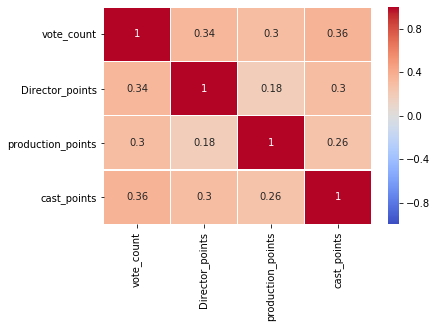

In [467]:
final_tmdb['Release popularity'] = (0.4)*df_normalized_Rp[0] + (0.3)*df_normalized_Rp[1] + (0.3)*df_normalized_Rp[2]

In [468]:
final_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit,dur_score,Current_popularity,Release popularity,endurance
count,10900.000000,10900.000000,1.090000e+04,1.090000e+04,10900.000000,10900.000000,10900.000000,10900.000000,1.090000e+04,1.090000e+04,...,10900.000000,10900.000000,10900.000000,1.090000e+04,1.090000e+04,1.090000e+04,10900.000000,10900.000000,10900.000000,10900.000000
mean,65980.661284,0.649498,1.631633e+07,3.995642e+07,102.101743,218.236789,5.975174,2001.320367,1.762488e+07,5.153980e+07,...,23.061685,22.669048,-0.920459,2.400406e+05,6.068950e+05,3.668544e+05,46.435600,0.362038,0.353471,0.095510
std,92054.450204,1.034034,3.192169e+07,1.170185e+08,31.358108,577.849608,0.934497,12.809369,3.438479e+07,1.446711e+08,...,10.788277,10.514537,0.348543,4.417399e+05,1.703930e+06,1.467995e+06,20.598564,0.073896,0.139949,0.032092
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,-1.000000,0.000000e+00,0.000000e+00,-4.859896e+06,11.338496,0.026167,0.000000,-0.002919
25%,10587.750000,0.207759,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,...,15.877830,16.058758,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,22.670025,0.316226,0.233239,0.074893
50%,20617.000000,0.384145,1.175280e+06,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,...,21.630435,21.349434,-1.000000,2.087723e+04,0.000000e+00,0.000000e+00,60.785398,0.365633,0.382741,0.092384
75%,75480.250000,0.716003,2.000000e+07,2.420708e+07,111.000000,146.000000,6.600000,2011.000000,2.098589e+07,3.388830e+07,...,31.146521,31.146521,-1.000000,3.031980e+05,4.002232e+05,7.146278e+03,61.656871,0.409415,0.462181,0.112278
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,...,59.446425,57.226441,3.000000,5.408851e+06,3.353708e+07,3.306131e+07,68.258427,0.785279,0.784544,0.334991


In [469]:
final_tmdb.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'cast_points', 'production_points', 'Director_points',
       'year_of_release', 'decade_of_release', 'month_of_release',
       'genre_score_atRelease', 'genre_score_atPresent', 'oscars_won',
       'inflated_budget', 'inflated_revenue', 'inflated_profit', 'dur_score',
       'Current_popularity', 'Release popularity', 'endurance'],
      dtype='object')

In [470]:
final_tmdb['endurance'] = (0.6 * (final_tmdb['Current_popularity'] - final_tmdb['Release popularity']) 
                        + 0.4 * (final_tmdb['Current_popularity'] + final_tmdb['Release popularity']))/ 2

In [471]:
final_tmdb.nlargest(10,'endurance')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,...,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit,dur_score,Current_popularity,Release popularity,endurance
2881,155,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,...,41.709087,42.935392,1.0,2.164400e+06,1.172194e+07,9.557544e+06,15.673104,0.785279,0.423543,0.350285
632,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,...,27.387029,27.387029,-1.0,1.798091e+06,6.775559e+06,4.977469e+06,11.338496,0.722790,0.284011,0.332994
1925,27205,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,...,32.515872,32.515872,-1.0,1.888683e+06,9.744422e+06,7.855740e+06,11.338496,0.718559,0.323546,0.326925
4375,49026,6.591277,250000000,1081041287,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Christopher Nolan,165,Action|Crime|Drama|Thriller,Legendary Pictures|Warner Bros.|DC Entertainme...,...,42.935392,42.935392,-1.0,2.808179e+06,1.214303e+07,9.334850e+06,11.338496,0.742430,0.444656,0.326750
10256,424,2.377288,22000000,321265768,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,Steven Spielberg,195,Drama|History|War,Universal Pictures|Amblin Entertainment,...,19.857412,19.942736,0.0,3.883136e+05,5.670539e+06,5.282226e+06,20.158103,0.686774,0.201637,0.323223
6581,1422,2.819750,90000000,289847354,The Departed,Leonardo DiCaprio|Matt Damon|Jack Nicholson|Ma...,Martin Scorsese,151,Drama|Thriller|Crime,Vertigo Entertainment|Media Asia Films|Warner ...,...,33.239467,34.457861,0.0,1.147727e+06,3.696286e+06,2.548559e+06,15.673104,0.686225,0.310164,0.312096
6208,272,5.400826,150000000,374218673,Batman Begins,Christian Bale|Michael Caine|Liam Neeson|Katie...,Christopher Nolan,140,Action|Crime|Drama,DC Comics|Legendary Pictures|Warner Bros.|DC E...,...,31.094985,30.872650,-1.0,1.984674e+06,4.951346e+06,2.966672e+06,15.673104,0.689984,0.342155,0.310777
7290,238,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,Paramount Pictures|Alfran Productions,...,24.750958,22.395120,1.0,3.729652e+05,1.523354e+07,1.486058e+07,23.137255,0.648591,0.249415,0.299354
9004,857,2.170136,70000000,481840909,Saving Private Ryan,Tom Hanks|Tom Sizemore|Dennis Farina|Max Marti...,Steven Spielberg,169,Drama|History|War,Paramount Pictures|DreamWorks SKG|Amblin Enter...,...,19.857412,19.942736,0.0,1.103812e+06,7.598029e+06,6.494216e+06,20.158103,0.644095,0.241322,0.297915
3930,640,2.973115,52000000,352114312,Catch Me If You Can,Leonardo DiCaprio|Tom Hanks|Christopher Walken...,Steven Spielberg,141,Drama|Crime,DreamWorks SKG|Kemp Company|Splendid Pictures,...,22.625366,22.395120,0.0,7.397452e+05,5.009132e+06,4.269387e+06,15.673104,0.635973,0.216116,0.296375


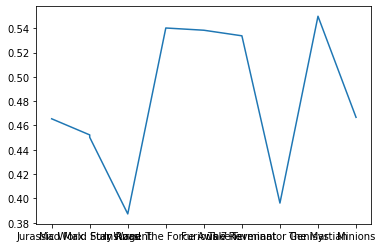

In [522]:
plt.plot(final_tmdb['original_title'].head(n=10),final_tmdb['Current_popularity'].head(n=10))

In [472]:
Linear_RegModel = final_tmdb.filter(['popularity', 'cast_points', 'production_points', 'Director_points','year_of_release',
       'genre_score_atRelease', 'genre_score_atPresent', 'oscars_won','inflated_budget', 'inflated_revenue', 'inflated_profit', 'dur_score',
       'Current_popularity', 'Release popularity'])
Linear_RegModel.isna().sum()
Y = final_tmdb.filter(['endurance'])
Y
le = LabelEncoder()
Linear_RegModel = Linear_RegModel.apply(le.fit_transform)
#feature,result = linear_reg.loc[:linear_reg.columns != 'popularity'], linear_reg['popularity']
X_train, X_test, y_train, y_test = train_test_split(Linear_RegModel,Y, test_size=0.2)
lm = LinearRegression().fit(X_train,y_train) 
y_pred = lm.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:'+str(rmse))


Root Mean Squared Error:0.00929721142570161


In [478]:
Ridge_RegModel = final_tmdb.filter(['popularity', 'cast_points', 'production_points', 'Director_points','year_of_release',
       'genre_score_atRelease', 'genre_score_atPresent', 'oscars_won','inflated_budget', 'inflated_revenue', 'inflated_profit', 'dur_score',
       'Current_popularity', 'Release popularity'])
Ridge_RegModel.isna().sum()
Y = final_tmdb.filter(['endurance'])
Y
le = LabelEncoder()
Ridge_RegModel = Ridge_RegModel.apply(le.fit_transform)
#feature,result = linear_reg.loc[:linear_reg.columns != 'popularity'], linear_reg['popularity']
X_train, X_test, y_train, y_test = train_test_split(Ridge_RegModel,Y, test_size=0.2)
lm = Ridge(alpha = 10).fit(X_train,y_train) 
y_pred = lm.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:'+str(rmse))


Root Mean Squared Error:0.010735150095225006


In [481]:
Lasso_RegModel = final_tmdb.filter(['popularity', 'cast_points', 'production_points', 'Director_points','year_of_release',
       'genre_score_atRelease', 'genre_score_atPresent', 'oscars_won','inflated_budget', 'inflated_revenue', 'inflated_profit', 'dur_score',
       'Current_popularity', 'Release popularity'])
Lasso_RegModel.isna().sum()
Y = final_tmdb.filter(['endurance'])
Y
le = LabelEncoder()
Lasso_RegModel = Lasso_RegModel.apply(le.fit_transform)
#feature,result = linear_reg.loc[:linear_reg.columns != 'popularity'], linear_reg['popularity']
X_train, X_test, y_train, y_test = train_test_split(Lasso_RegModel,Y, test_size=0.2)
lm = Lasso(alpha = 0.1).fit(X_train,y_train) 
y_pred = lm.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:'+str(rmse))


Root Mean Squared Error:0.011120279629658275


In [475]:
forest_model = RandomForestRegressor(
    n_estimators=400, max_features=0.4,
    min_samples_leaf=30, n_jobs=-1)
 
X = final_tmdb.filter(['popularity', 'cast_points', 'production_points', 'Director_points','year_of_release',
       'genre_score_atRelease', 'genre_score_atPresent', 'oscars_won','inflated_budget', 'inflated_revenue', 'inflated_profit', 'dur_score',
       'Current_popularity', 'Release popularity', 'endurance'])
X.isna().sum()
Y = final_tmdb.filter(['endurance'])
X = X.apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
lm = Lasso(alpha = 100).fit(X_train,y_train) 
y_pred = lm.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:'+str(rmse))


Root Mean Squared Error:0.033863158241783355


In [390]:
import seaborn as sns

In [391]:
final_tmdb.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
production_companies      object
release_date              object
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
cast_points              float64
production_points        float64
Director_points          float64
year_of_release            int64
decade_of_release         object
month_of_release           int64
genre_score_atRelease    float64
genre_score_atPresent    float64
oscars_won               float64
inflated_budget          float64
inflated_revenue         float64
inflated_profit          float64
dur_score                float64
Current_popularity       float64
Release po

In [392]:
train_1 = final_tmdb.filter(['endurance','genre_score_atPresent','genre_score_atRelease','Current_popularity','Release popularity','vote_average','dur_score','inflated_profit','oscars_won','Director_points','production_points','cast_points']) 

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

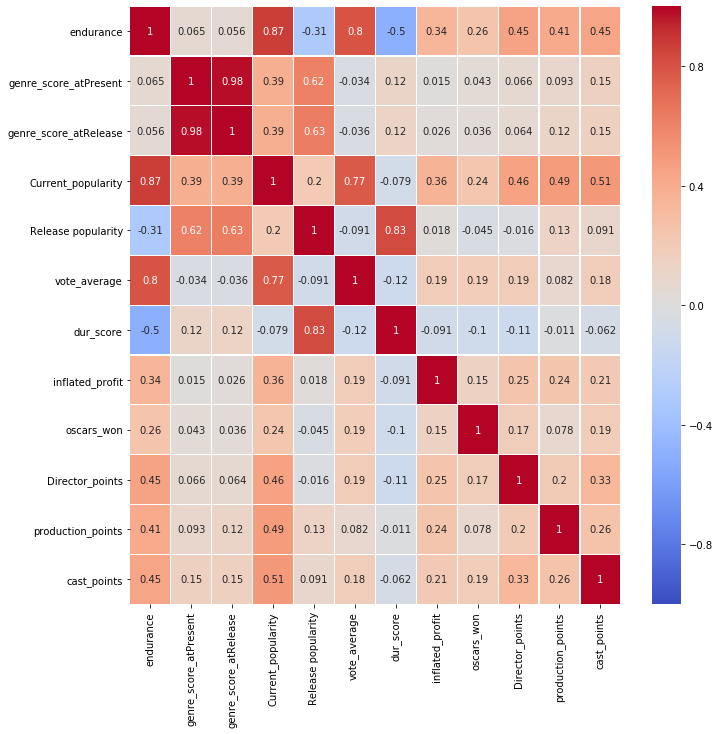

In [394]:
plt.figure(figsize=(11,11))
sns.heatmap(train_1.corr(),vmin=-1,vmax=1,cmap='coolwarm',linewidths=0.2,annot=True);

In [403]:
final_tmdb.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
production_companies      object
release_date              object
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
cast_points              float64
production_points        float64
Director_points          float64
year_of_release            int64
decade_of_release         object
month_of_release           int64
genre_score_atRelease    float64
genre_score_atPresent    float64
oscars_won               float64
inflated_budget          float64
inflated_revenue         float64
inflated_profit          float64
dur_score                float64
Current_popularity       float64
Release po

## Oscars effect on endurance

In [408]:
df_winning = final_tmdb.loc[(final_tmdb['oscars_won'] > 0)]

In [413]:
df_nominated = final_tmdb.loc[(final_tmdb['oscars_won'] == 0)]

In [426]:
final_tmdb['endurance'].max()

0.33499061356446613

In [427]:
final_tmdb['endurance'].mean()

0.09551030803635098

In [420]:
df_winning['endurance'].mean()

0.13283207114937368

In [421]:
df_nominated['endurance'].mean()

0.13154501914278316

## Genres effect on movie's popularity over time

In [430]:
western_past = final_tmdb.loc[(final_tmdb['decade_of_release'] == '1960-1970')]

In [513]:
end =0
count =0
for index, row in western_past.iterrows():
    s = row['genres']
    l = s.split('|')
    #print(l)
    if 'Western' in l or 'War' in l:
        count+=1
        end = end + row['Current_popularity']
print(end)
print(count)

17.279343103183525
66


In [450]:
western_current = final_tmdb.loc[(final_tmdb['decade_of_release'] == '2010-2020')]

In [453]:
western_current

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,...,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit,dur_score,Current_popularity,Release popularity,endurance
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,...,29.777169,29.777169,-1.0,1.617592e+06,1.632182e+07,1.470422e+07,11.338496,0.380020,0.290082,0.161002
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,29.777169,29.777169,-1.0,1.623259e+06,4.095334e+06,2.472075e+06,11.338496,0.325070,0.290397,0.133495
2,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,29.777169,29.777169,-1.0,1.623259e+06,4.095334e+06,2.472075e+06,11.338496,0.322116,0.290397,0.132018
3,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,...,21.299639,21.299639,-1.0,1.198890e+06,3.217800e+06,2.018910e+06,60.785398,0.281738,0.470429,0.093826
4,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,...,20.614963,20.614963,-1.0,2.176057e+06,2.250237e+07,2.032632e+07,11.338496,0.441626,0.259407,0.194873
5,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,...,24.785261,24.785261,-1.0,2.066608e+06,1.638330e+07,1.431669e+07,11.338496,0.446911,0.281397,0.195316
6,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,...,35.242126,35.242126,1.0,1.468839e+06,5.798654e+06,4.329816e+06,11.338496,0.436734,0.318604,0.186506
7,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,...,29.777169,29.777169,-1.0,1.671512e+06,4.751446e+06,3.079934e+06,11.338496,0.316952,0.293073,0.129169
8,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,...,27.387029,27.387029,0.0,1.168059e+06,6.439251e+06,5.271192e+06,11.338496,0.444366,0.249066,0.197276
9,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,...,24.635877,24.635877,-1.0,7.980122e+05,1.247413e+07,1.167612e+07,60.785398,0.386317,0.470643,0.146094


In [516]:
end =0
count =0
for index, row in western_current.iterrows():
    s = str(row['genres'])
    l = s.split('|')
    #print(l)
    if 'Western' in l or 'War' in l:
        count+=1
        end = end + row['Current_popularity']
print(end)
print(count)

25.55045373379339
93


In [524]:
final_tmdb.isna().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                 44
runtime                   0
genres                   23
production_companies      0
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
cast_points               0
production_points         0
Director_points           0
year_of_release           0
decade_of_release         0
month_of_release          0
genre_score_atRelease     0
genre_score_atPresent     0
oscars_won                0
inflated_budget           0
inflated_revenue          0
inflated_profit           0
dur_score                 0
Current_popularity        0
Release popularity        0
endurance                 0
dtype: int64

In [540]:
tmdb_high_endurance = final_tmdb.loc[(final_tmdb['endurance'] > 0.27)]

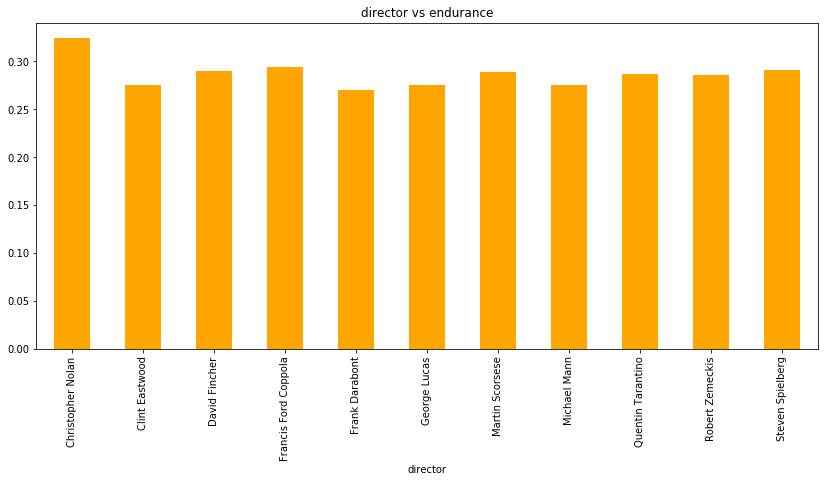

In [542]:

plt.figure(figsize=(14, 6))
tmdb_high_endurance.groupby(['director']).mean()['endurance'].plot(kind="bar", title='director vs endurance',color='orange')


In [569]:
import math
sorted_final = final_tmdb.copy()
sorted_final = sorted_final.sort_values('Current_popularity',ascending=False)
result = sorted_final.head(math.ceil(0.023*10900))

result

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,...,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit,dur_score,Current_popularity,Release popularity,endurance
2881,155,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,...,41.709087,42.935392,1.0,2.164400e+06,1.172194e+07,9.557544e+06,15.673104,0.785279,0.423543,0.350285
4375,49026,6.591277,250000000,1081041287,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Christopher Nolan,165,Action|Crime|Drama|Thriller,Legendary Pictures|Warner Bros.|DC Entertainme...,...,42.935392,42.935392,-1.0,2.808179e+06,1.214303e+07,9.334850e+06,11.338496,0.742430,0.444656,0.326750
632,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,...,27.387029,27.387029,-1.0,1.798091e+06,6.775559e+06,4.977469e+06,11.338496,0.722790,0.284011,0.332994
1925,27205,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,...,32.515872,32.515872,-1.0,1.888683e+06,9.744422e+06,7.855740e+06,11.338496,0.718559,0.323546,0.326925
6208,272,5.400826,150000000,374218673,Batman Begins,Christian Bale|Michael Caine|Liam Neeson|Katie...,Christopher Nolan,140,Action|Crime|Drama,DC Comics|Legendary Pictures|Warner Bros.|DC E...,...,31.094985,30.872650,-1.0,1.984674e+06,4.951346e+06,2.966672e+06,15.673104,0.689984,0.342155,0.310777
10256,424,2.377288,22000000,321265768,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,Steven Spielberg,195,Drama|History|War,Universal Pictures|Amblin Entertainment,...,19.857412,19.942736,0.0,3.883136e+05,5.670539e+06,5.282226e+06,20.158103,0.686774,0.201637,0.323223
6581,1422,2.819750,90000000,289847354,The Departed,Leonardo DiCaprio|Matt Damon|Jack Nicholson|Ma...,Martin Scorsese,151,Drama|Thriller|Crime,Vertigo Entertainment|Media Asia Films|Warner ...,...,33.239467,34.457861,0.0,1.147727e+06,3.696286e+06,2.548559e+06,15.673104,0.686225,0.310164,0.312096
1393,16869,6.098027,70000000,319131050,Inglourious Basterds,Brad Pitt|MÃ©lanie Laurent|Christoph Waltz|Eli...,Quentin Tarantino,153,Drama|Action|Thriller|War,Universal Pictures|A Band Apart|Zehnte Babelsb...,...,37.593415,39.499564,1.0,8.346331e+05,3.805105e+06,2.970472e+06,15.673104,0.649171,0.322095,0.292376
7290,238,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,Paramount Pictures|Alfran Productions,...,24.750958,22.395120,1.0,3.729652e+05,1.523354e+07,1.486058e+07,23.137255,0.648591,0.249415,0.299354
4191,13,6.715966,55000000,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142,Comedy|Drama|Romance,Paramount Pictures,...,40.763263,36.686170,1.0,9.537755e+05,1.175650e+07,1.080273e+07,20.158103,0.645870,0.373671,0.285568


In [570]:
imdb_top_250 = pd.read_csv(r'C:\Users\preet\Desktop\Movies\imdb-top-250.csv')

In [571]:
imdb_top_250=imdb_top_250.dropna()
imdb_top_250

,rank,original_title
1,1.0,The Shawshank Redemption
2,2.0,The Godfather
3,3.0,The Godfather: Part II
4,4.0,The Dark Knight
5,5.0,12 Angry Men
6,6.0,Schindler's List
7,7.0,The Lord of the Rings: The Return of the King
8,8.0,Pulp Fiction
9,9.0,"Il buono, il brutto, il cattivo"
10,10.0,Fight Club


In [572]:
imdb_top_250=pd.merge(imdb_top_250,result,on='original_title')

In [573]:
imdb_top_250

,rank,original_title,id,popularity,budget,revenue,cast,director,runtime,genres,...,genre_score_atRelease,genre_score_atPresent,oscars_won,inflated_budget,inflated_revenue,inflated_profit,dur_score,Current_popularity,Release popularity,endurance
0,1.0,The Shawshank Redemption,278,7.192039,25000000,28341469,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,...,23.799539,22.395120,0.0,4.306325e+05,4.881903e+05,5.755781e+04,20.158103,0.586673,0.230510,0.270286
1,2.0,The Godfather,238,5.738034,6000000,245066411,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,...,24.750958,22.395120,1.0,3.729652e+05,1.523354e+07,1.486058e+07,23.137255,0.648591,0.249415,0.299354
2,3.0,The Godfather: Part II,240,3.264571,13000000,47542841,Al Pacino|Robert Duvall|Diane Keaton|Robert De...,Francis Ford Coppola,200,Drama|Crime,...,24.750958,22.395120,-1.0,6.446047e+05,2.357411e+06,1.712806e+06,23.137255,0.629581,0.264482,0.288342
3,4.0,The Dark Knight,155,8.466668,185000000,1001921825,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,...,41.709087,42.935392,1.0,2.164400e+06,1.172194e+07,9.557544e+06,15.673104,0.785279,0.423543,0.350285
4,6.0,Schindler's List,424,2.377288,22000000,321265768,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,Steven Spielberg,195,Drama|History|War,...,19.857412,19.942736,0.0,3.883136e+05,5.670539e+06,5.282226e+06,20.158103,0.686774,0.201637,0.323223
5,7.0,The Lord of the Rings: The Return of the King,122,7.122455,94000000,1118888979,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,201,Adventure|Fantasy|Action,...,17.415791,16.058758,-1.0,1.312562e+06,1.562353e+07,1.431096e+07,15.673104,0.546172,0.212833,0.251803
6,8.0,Pulp Fiction,680,8.093754,8000000,213928762,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino,154,Thriller|Crime,...,16.083036,16.307731,0.0,1.377102e+05,3.682522e+06,3.544812e+06,20.158103,0.583015,0.162341,0.275273
7,10.0,Fight Club,550,8.947905,63000000,100853753,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139,Drama,...,18.137974,18.150131,-1.0,9.639000e+05,1.543062e+06,5.791624e+05,20.158103,0.611902,0.221993,0.283752
8,11.0,The Lord of the Rings: The Fellowship of the Ring,120,8.575419,93000000,871368364,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,178,Adventure|Fantasy|Action,...,17.415791,16.058758,0.0,1.354453e+06,1.269062e+07,1.133616e+07,15.673104,0.531834,0.215157,0.244401
9,12.0,Forrest Gump,13,6.715966,55000000,677945399,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142,Comedy|Drama|Romance,...,40.763263,36.686170,1.0,9.537755e+05,1.175650e+07,1.080273e+07,20.158103,0.645870,0.373671,0.285568


Text(0.5, 1.0, 'current popularity vs endurance')

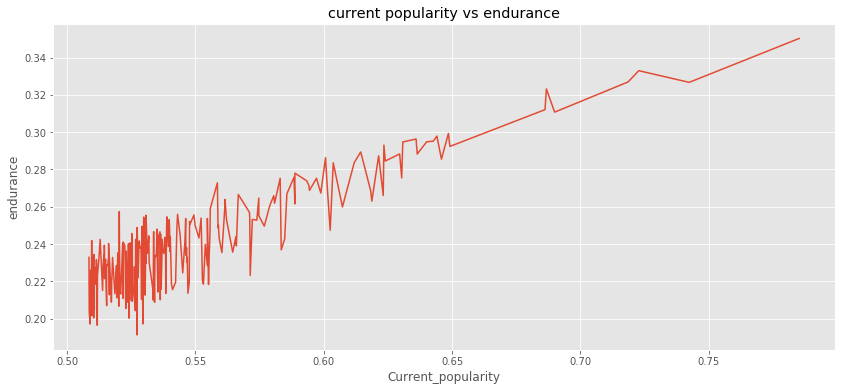

In [580]:
plt.figure(figsize=(14, 6))
sns.lineplot(result['Current_popularity'],result['endurance']).set_title('current popularity vs endurance')

Text(0.5, 1.0, 'Release popularity vs endurance')

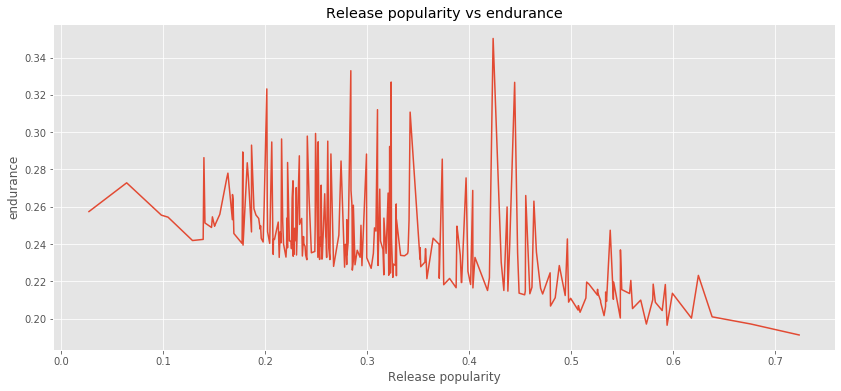

In [582]:
plt.figure(figsize=(14, 6))
plt.style.use('ggplot')
sns.lineplot(result['Release popularity'],result['endurance']).set_title('Release popularity vs endurance')